In [9]:
import numpy as np

In [2]:
a,b,m,x=5,13,16,7

In [8]:
x=(a*x+b)%m #Generador de números pseudoaleatorios congruenciales enteros
x

9

In [14]:
a,b,m,x0=5,3,16,7

n=np.arange(1,20)
x=(a**n*x0+b*(a**n-1)/(a-1))%m
x

array([ 6.,  1.,  8., 11., 10.,  5., 12., 15., 14.,  9.,  0.,  3.,  2.,
       13.,  4.,  7.,  6.,  1.,  8.])

In [15]:
#Si queremos una cadena más grande (25), la potencia $a^n$ no regresa resultados coherentes
n=np.arange(1,25)
x=(a**n*x0+b*(a**n-1)/(a-1))%m
x

array([ 6.,  1.,  8., 11., 10.,  5., 12., 15., 14.,  9.,  0.,  3.,  2.,
       13.,  4.,  7.,  6.,  1.,  8., 11., 10.,  8.,  0.,  0.])

### Programemos este método

De acuerdo a lo descrito arriba, quisiéramos programar una función que reciba:
- la semilla $x_0$,
- el multiplicador $a$,
- el incremento $b$,
- el módulo $m$, y
- la cantidad de elementos de la secuencia pseudoaleatoria requeridos $n$,

y que retorne la secuencia pseudoaleatoria de longitud $n$.

In [19]:
def congruencial(x0,a,b,m,n):
  x=np.zeros(n+1)
  x[0]=x0
  for i in range(1,n+1):
    x[i]=(a*x[i-1]+b)%m
  return np.array(x[1:])/m #omitimos el cero, "la semilla"

**Ejemplo**

Probar con los conjuntos de parámetros anteriores:
1. $m=9$, $a=5$, $b=1$, $x_0=1$.
2. $m=16$, $a=5$, $b=3$, $x_0=7$.

Además,
- Para el conjunto de parámetros 1, probar con las semillas $x_0=5,8$.
- Para el conjunto de parámetros 2, probar con diferentes semillas.

In [20]:
a,b,m,x0=5,1,9,5
congruencial(x0,a,b,m,10)

array([0.88888889, 0.55555556, 0.88888889, 0.55555556, 0.88888889,
       0.55555556, 0.88888889, 0.55555556, 0.88888889, 0.55555556])

In [23]:
a,b,m,x0=5,3,16,8
congruencial(x0,a,b,m,10)*m

array([11., 10.,  5., 12., 15., 14.,  9.,  0.,  3.,  2.])

Entonces vemos que la calidad de nuestro generador congruencial depende fuertemente de la elección de los parámetros, pues quisiéramos que los periodos sean lo más grandes posible ($m$).

Cuando el periodo de un generador congruencial coincide con el módulo $m$, lo llamaremos *generador de ciclo completo*. El periodo de este tipo de generadores es independiente de la semilla que utilicemos.

El siguiente Teorema nos da condiciones para crear generadores de ciclo completo:

**Teorema.** Un generador congruencial tiene periodo completo si y sólo si se cumplen las siguientes condiciones:
1. $m$ y $b$ son primos entre sı́.
2. Si $q$ es un número primo que divide a $m$, entonces $q$ divide a $a − 1$.
3. Si $4$ divide a m, entonces 4 divide a $a − 1$.

In [24]:
#Para que dos números sean coprimos, deben compartir de divisores únicamente al 1


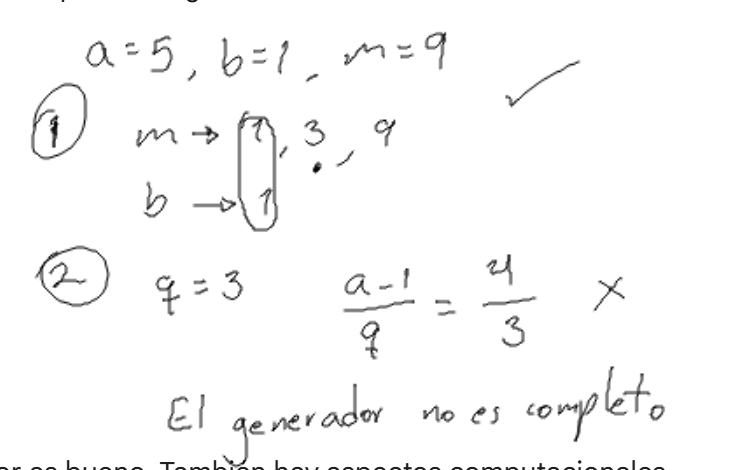

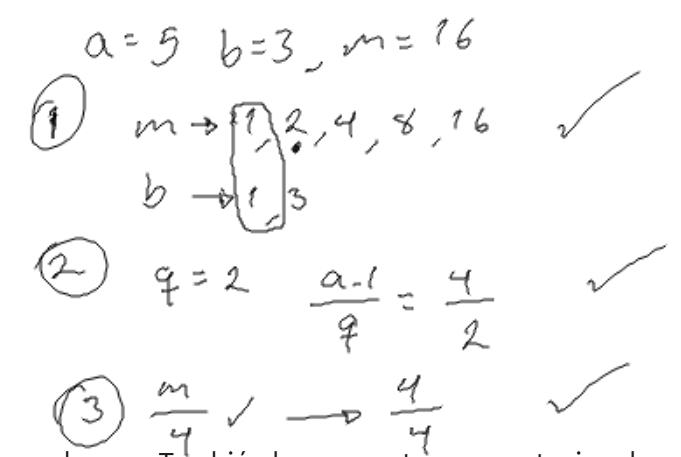

### Comentarios adicionales sobre el generador congruencial

Hasta ahora solo nos basamos en aspectos teóricos para ver si un generador es bueno. También hay aspectos computacionales...

En ese sentido los generadores multiplicativos son más eficientes que los mixtos porque se ahorran la operación de suma. Sin embargo, por el **Teorema** <font color=red>¿qué pasa con los generadores multiplicativos?</font>

De igual forma, una elección computacionalmente adecuada es $m=2^k$ (se elige m grande para tener periodos grandes). Con esta elección, y $k\geq2$, el generador tendrá periodo completo si y sólo si $b$ es impar y $1 = a \mod 4$ #Que a entre 4 me de 1.

Si se combina lo anterior (generador multiplicativo con $m=2^k$), obtenemos que el periodo máximo que se puede obtener es una cuarta parte de $m$, $\frac{2^k}{4}=2^{k-2}$ y se alcanza únicamente para $x_0$ impar y, $3 = a \mod 8$ o $5 = a \mod 8$ (que a entre 8 me de 5).

Un generador multiplicativo muy utilizado, conocido como *RANDU*, tomaba $m = 2^{31}$ y $a = 2^{16} + 3$. Sin embargo, se ha demostrado que tiene propiedades estadı́sticas bastante malas.

Los generadores multiplicativos más famosos utilizados por IBM tomaban $m = 2^{31} − 1$ y $a = 7^5, 630360016$.

Pueden encontrar más información en este [enlace](https://en.wikipedia.org/wiki/Linear_congruential_generator).

- Se pueden hacer combinaciones de generadores y otros generadores más complicados...

**Ejemplo**

Tomar los parámetros $m=2^{31} − 1$, $a=1103515245$ y $b=12345$, y generar una secuencia pseudoaleatoria uniforme estándar de $n=10^4$ elementos.

Luego, dibujar el histograma (diagrama de frecuencias). ¿Corresponde lo obtenido con lo que se imaginaban?


In [25]:
def congruencial(x0,a=1103515245,b=12345,m=2**31-1,n=1):
  x=np.zeros(n+1)
  x[0]=x0
  for i in range(1,n+1):
    x[i]=(a*x[i-1]+b)%m
  return np.array(x[1:])/m

In [27]:
congruencial(0,n=2)

array([5.74858859e-06, 6.55157002e-01])

In [28]:
import matplotlib.pyplot as plt


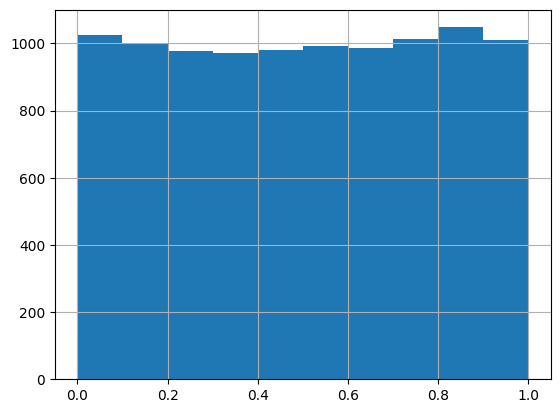

In [30]:
x=congruencial(0,n=10**4)
#U(0,1)="Valores aleatorios con distribución uniforme entre 0 y 1"
plt.hist(x)
plt.grid()